

## 1. Introduction

Emotion recognition in text is an essential task in NLP, where the goal is to classify text into distinct emotional categories such as joy, anger, sadness, fear, surprise, and neutral.
This task has various applications, including enhancing user experience in chatbots, monitoring public sentiment on social media, and improving mental health support systems.



## 2. Dataset Loading and EDA (Exploratory Data Analysis)

### Installing libraries

In [2]:
!pip install nlp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 18.6 MB/s eta 0:00:00


In [25]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import nlp
import random
import warnings
warnings.filterwarnings('ignore')

In [9]:
!pip install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
  Attempting uninstall: dill
    Found existing installation: dill 0.3.9
    Uninstalling dill-0.3.9:
      Successfully uninstalled dill-0.3.9
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [43]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the emotion dataset
dataset = load_dataset('emotion')

# Convert to a pandas DataFrame for easier analysis
train_data = dataset['train'].to_pandas()
test_data = dataset['test'].to_pandas()
dataset= pd.concat([train_data, test_data], axis=0)

In [97]:

dataset.to_csv('data_emotion.csv', index=False)


### EDA

In [99]:
# Define the label map
label_map = {
    0: 'Anger',
    1: 'Disgust',
    2: 'Fear',
    3: 'Joy',
    4: 'Sadness',
    5: 'Surprise'
}

# Preview the data
print("Data Sample:")
print(dataset.head())


Data Sample:
                                                text  label  \
0                            i didnt feel humiliated      0   
1  i can go from feeling so hopeless to so damned...      0   
2   im grabbing a minute to post i feel greedy wrong      3   
3  i am ever feeling nostalgic about the fireplac...      2   
4                               i am feeling grouchy      3   

                                        cleaned_text  
0                            i didnt feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2   im grabbing a minute to post i feel greedy wrong  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy  


In [100]:

# Check for missing values
print("\nMissing Values in Training Data:")
print(train_data.isnull().sum())



Missing Values in Training Data:
text           0
label          0
text_length    0
dtype: int64


In [101]:

# Display basic statistics of text length
train_data['text_length'] = train_data['text'].apply(len)
print("\nText Length Statistics:")
print(train_data['text_length'].describe())



Text Length Statistics:
count    16000.000000
mean        96.845812
std         55.904953
min          7.000000
25%         53.000000
50%         86.000000
75%        129.000000
max        300.000000
Name: text_length, dtype: float64


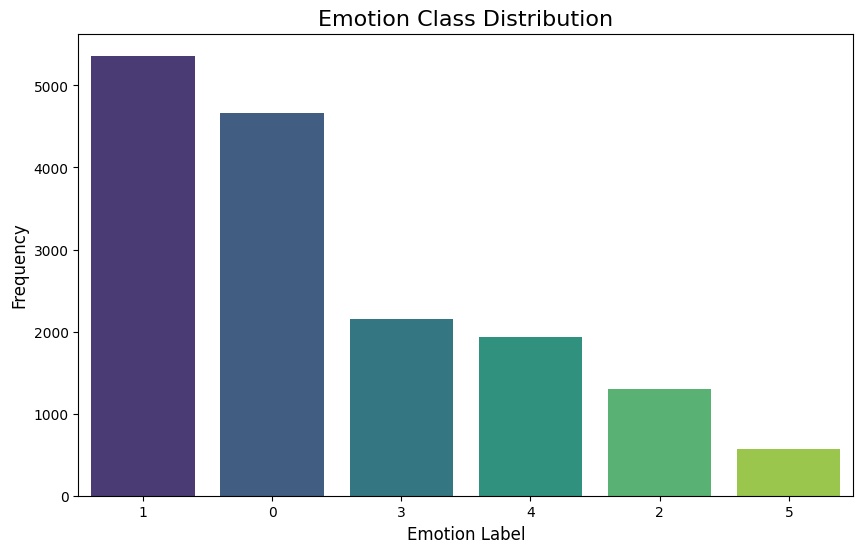

In [102]:

# Visualize emotion class distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x='label', order=train_data['label'].value_counts().index, palette='viridis')
plt.title("Emotion Class Distribution", fontsize=16)
plt.xlabel("Emotion Label", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()


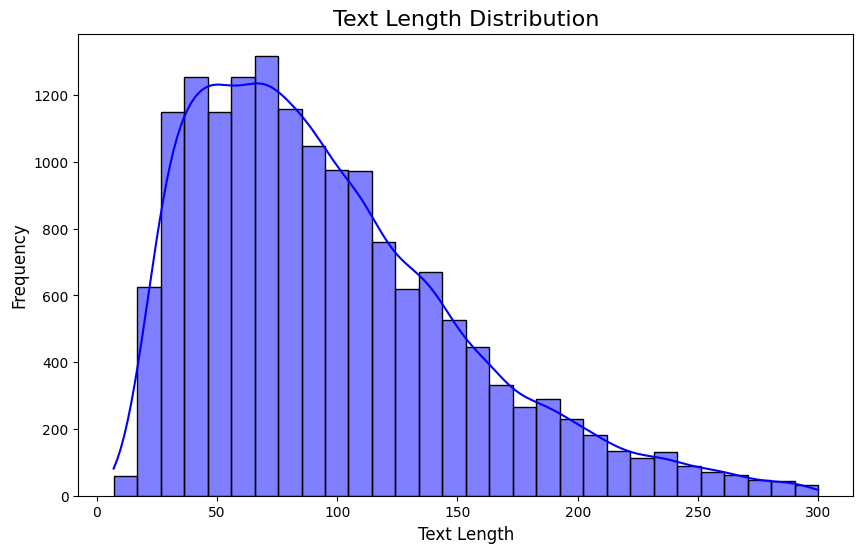

In [103]:

# Visualize text length distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_data['text_length'], kde=True, bins=30, color='blue')
plt.title("Text Length Distribution", fontsize=16)
plt.xlabel("Text Length", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.show()

In [51]:


# Show example texts for each label
print("\nExample Texts for Each Emotion:")
for label in train_data['label'].unique():
    example = train_data[train_data['label'] == label].iloc[0]['text']
    print(f"Emotion: {label}, Example: {example}")



Example Texts for Each Emotion:
Emotion: 0, Example: i didnt feel humiliated
Emotion: 3, Example: im grabbing a minute to post i feel greedy wrong
Emotion: 2, Example: i am ever feeling nostalgic about the fireplace i will know that it is still on the property
Emotion: 5, Example: ive been taking or milligrams or times recommended amount and ive fallen asleep a lot faster but i also feel like so funny
Emotion: 4, Example: i feel as confused about life as a teenager or as jaded as a year old man
Emotion: 1, Example: i have been with petronas for years i feel that petronas has performed well and made a huge profit


#  3. Dataset Preprocessing


In [52]:
# Text Preprocessing functions

# Lowercase conversion
def clean_text(text):
    # Remove non-alphabetical characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text, re.I)
    text = text.lower()

    return text


In [53]:

# Apply text cleaning to the dataset
dataset['cleaned_text'] = dataset['text'].apply(clean_text)

# Remove stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [54]:
df= dataset.copy()
df.head()

,text,label,cleaned_text
0,i didnt feel humiliated,0,i didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,0,i can go from feeling so hopeless to so damned...
2,im grabbing a minute to post i feel greedy wrong,3,im grabbing a minute to post i feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,2,i am ever feeling nostalgic about the fireplac...
4,i am feeling grouchy,3,i am feeling grouchy


In [55]:

def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

df['cleaned_text'] = df['cleaned_text'].apply(remove_stopwords)

# Lemmatization (optional step to reduce words to their base form)
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(words)

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [56]:

df['cleaned_text'] = df['cleaned_text'].apply(lemmatize_text)

df['cleaned_text'].head()

,cleaned_text
0,didnt feel humiliated
1,go feeling hopeless damned hopeful around some...
2,im grabbing minute post feel greedy wrong
3,ever feeling nostalgic fireplace know still pr...
4,feeling grouchy


In [57]:
# Check the cleaned text
df[['text', 'cleaned_text']].head()


,text,cleaned_text
0,i didnt feel humiliated,didnt feel humiliated
1,i can go from feeling so hopeless to so damned...,go feeling hopeless damned hopeful around some...
2,im grabbing a minute to post i feel greedy wrong,im grabbing minute post feel greedy wrong
3,i am ever feeling nostalgic about the fireplac...,ever feeling nostalgic fireplace know still pr...
4,i am feeling grouchy,feeling grouchy


In [76]:
df.isnull().sum()

,0
text,0
label,0
cleaned_text,0


# 4.	Dataset Splitting


In [68]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_text'], df['label'], test_size=0.2, random_state=42)


In [69]:
train_data.head()

,text,label,text_length
0,i didnt feel humiliated,0,23
1,i can go from feeling so hopeless to so damned...,0,108
2,im grabbing a minute to post i feel greedy wrong,3,48
3,i am ever feeling nostalgic about the fireplac...,2,92
4,i am feeling grouchy,3,20


In [70]:
test_data.head()

,text,label
0,im feeling rather rotten so im not very ambiti...,0
1,im updating my blog because i feel shitty,0
2,i never make her separate from me because i do...,0
3,i left with my bouquet of red and yellow tulip...,1
4,i was feeling a little vain when i did this one,0


In [71]:


# Example of checking the first few rows
print(X_train.head())
print(y_train.head())


1921     went work like normal didnt feel bad way shape...
5732                                 feel like im stubborn
2455     transferred operating bed began feel little ap...
12131                  feel unimportant even fucking funny
612           im feeling completely mellow perfect tonight
Name: cleaned_text, dtype: object
1921     0
5732     3
2455     4
12131    0
612      1
Name: label, dtype: int64


# 5. Feature Engineering

 TF-IDF Vectorizer with N-Grams

In [72]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit the vectorizer on the training data and transform the text into feature vectors
X_train_tfidf = vectorizer.fit_transform(X_train)

# Transform the test data using the already fitted vectorizer
X_test_tfidf = vectorizer.transform(X_test)

# Check the shape of the transformed features
print(X_train_tfidf.shape)



(14400, 5000)


# 6. Model Training and Evaluation

## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize and train the model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train_tfidf, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test_tfidf)

# Evaluate the model using the test set labels (y_test)
accuracy = accuracy_score(y_test, y_pred)  # Change here: Use y_test instead of y_train
print(f'Logistic Regression Accuracy: {accuracy * 100:.2f}%')

Logistic Regression Accuracy: 86.67%


In [116]:
# Display classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']))



Classification Report:
              precision    recall  f1-score   support

       Anger       0.90      0.94      0.92      1079
     Disgust       0.84      0.96      0.89      1199
        Fear       0.87      0.66      0.75       302
         Joy       0.92      0.80      0.85       465
     Sadness       0.83      0.77      0.80       420
    Surprise       0.84      0.50      0.62       135

    accuracy                           0.87      3600
   macro avg       0.86      0.77      0.81      3600
weighted avg       0.87      0.87      0.86      3600



## Random Forest Model

In [81]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest model
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train_tfidf, y_train) # Use X_train_tfidf here

# Predict on the test set
y_pred_rf = rf.predict(X_test_tfidf) # Use X_test_tfidf here

# Evaluate the model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
print(f'Random Forest Accuracy: {rf_accuracy * 100:.2f}%')

Random Forest Accuracy: 87.39%


In [117]:
# Display classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']))



Classification Report:
              precision    recall  f1-score   support

       Anger       0.93      0.90      0.91      1079
     Disgust       0.88      0.91      0.90      1199
        Fear       0.81      0.72      0.76       302
         Joy       0.86      0.88      0.87       465
     Sadness       0.80      0.87      0.83       420
    Surprise       0.78      0.69      0.73       135

    accuracy                           0.87      3600
   macro avg       0.84      0.83      0.83      3600
weighted avg       0.87      0.87      0.87      3600



## Support Vector Machine

In [83]:
from sklearn.svm import SVC

# Train an SVM model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train) # Use X_train_tfidf instead of X_train

# Predict on the test set
y_pred_svm = svm.predict(X_test_tfidf) # Use X_test_tfidf instead of X_test

# Evaluate the model
svm_accuracy = accuracy_score(y_test, y_pred_svm)
print(f'SVM Accuracy: {svm_accuracy * 100:.2f}%')

SVM Accuracy: 88.22%


In [118]:
# Display classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm, target_names=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']))



Classification Report:
              precision    recall  f1-score   support

       Anger       0.92      0.93      0.92      1079
     Disgust       0.89      0.94      0.91      1199
        Fear       0.82      0.73      0.77       302
         Joy       0.90      0.84      0.87       465
     Sadness       0.81      0.83      0.82       420
    Surprise       0.82      0.68      0.74       135

    accuracy                           0.88      3600
   macro avg       0.86      0.82      0.84      3600
weighted avg       0.88      0.88      0.88      3600



## K-Nearest Neighbors

In [88]:
from sklearn.neighbors import KNeighborsClassifier

# Train a K-Nearest Neighbors model
knn = KNeighborsClassifier(n_neighbors=3)
# Use the TF-IDF transformed data for training
knn.fit(X_train_tfidf, y_train)

# Predict on the test set, using TF-IDF transformed data
y_pred_knn = knn.predict(X_test_tfidf)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, y_pred_knn)
print(f'K-Nearest Neighbors Accuracy: {knn_accuracy * 100:.2f}%')

K-Nearest Neighbors Accuracy: 76.78%


In [119]:
# Display classification report
from sklearn.metrics import classification_report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn, target_names=['Anger', 'Disgust', 'Fear', 'Joy', 'Sadness', 'Surprise']))



Classification Report:
              precision    recall  f1-score   support

       Anger       0.71      0.91      0.80      1079
     Disgust       0.79      0.83      0.81      1199
        Fear       0.75      0.53      0.62       302
         Joy       0.85      0.68      0.76       465
     Sadness       0.83      0.62      0.71       420
    Surprise       0.76      0.40      0.52       135

    accuracy                           0.77      3600
   macro avg       0.78      0.66      0.70      3600
weighted avg       0.78      0.77      0.76      3600



# Visualizing Results

### Accuracy Visualization

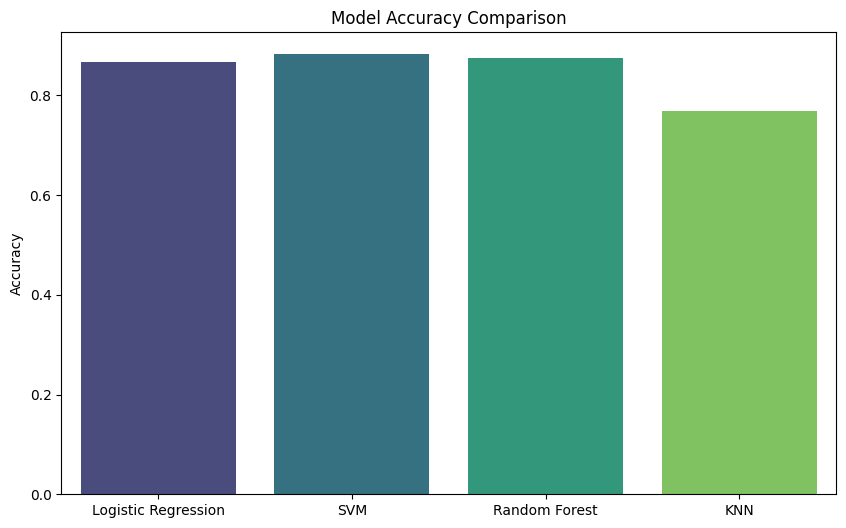

In [91]:
# Visualize the accuracy of all models
models = ['Logistic Regression', 'SVM', 'Random Forest', 'KNN']
accuracies = [accuracy, svm_accuracy, rf_accuracy, knn_accuracy]

plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=accuracies, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


### Confusion Matrix Visualization

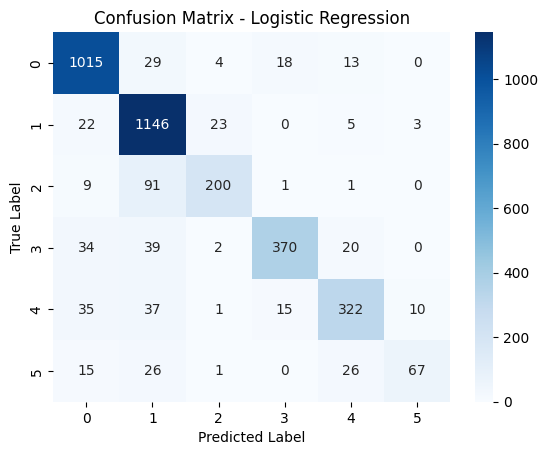

In [106]:
from sklearn.metrics import confusion_matrix

# For Logistic Regression
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map, yticklabels=label_map)
plt.title('Confusion Matrix - Logistic Regression')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


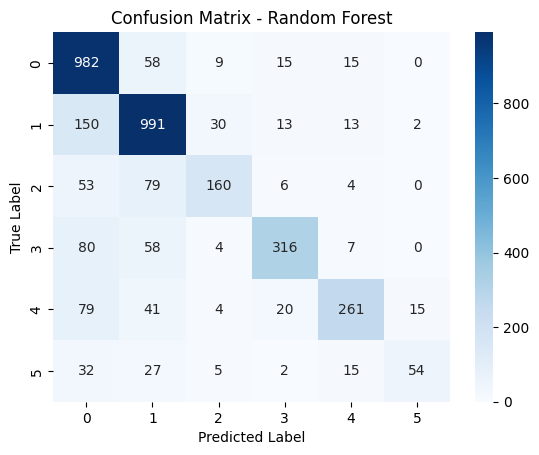

In [104]:
# For Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred_knn)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', xticklabels=label_map, yticklabels=label_map)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


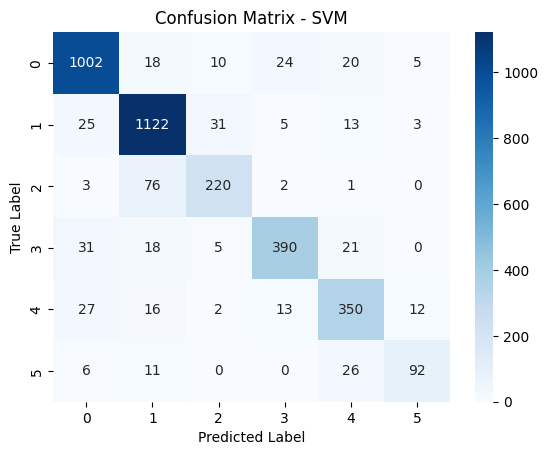

In [108]:

# For SVM
conf_matrix = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map, yticklabels=label_map)
plt.title('Confusion Matrix - SVM')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()


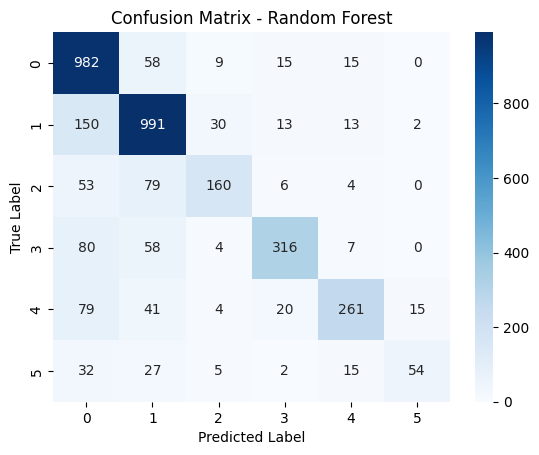

In [114]:

# For KNN
conf_matrix = confusion_matrix(y_test,  y_pred_knn)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_map, yticklabels=label_map)
plt.title('Confusion Matrix - Random Forest')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()
